# Exploratory Data Analysis in Python using Summer Olympics Dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
4. [Pandas Profiling Before Data Pre-Processing](#section4)<br>
5. [Data Pre-Processing](#section5)<br>
6. [Pandas Profiling After Data Pre-Processing](#section6)<br>
7. [Exploratory Data Analysis](#section7)<br>
    - [**Notes / Facts**](#section71)<br>
    - 7.1 [**Analysis based on Medal Distribution**](#section701)<br>
    - 7.2 [**Analysis Based on Sport Category**](#section702)<br>
    - 7.3 [**Analysis Based on Medals Won by Individual Athletes**](#section703)<br>
    - 7.4 [**Analysis Based on Medals Won by Countries**](#section704)<br>
    - 7.5 [**Analysis for Home Country Advantage**](#section705)<br>
    - 7.6 [**Analysis for No. of Events in Every Olympics**](#section706)<br>
    - 7.7 [**Analysis for Performance of India at Olympics**](#section707)<br>
    - 7.8 [**Analysis for Performance of Top Ranked Country (USA) at Olympics**](#section708)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
### 1. Problem Statement

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set.

Dataset Source : https://github.com/insaid2018/Term-1/tree/master/Data/Projects <br/>

<a id=section2></a>
### 2. Importing Packages

In [1]:
#Import Required Packages for EDA
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
# To apply seaborn whitegrid style to the plots.
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import seaborn as sns
# To adjust seaborn settings for the plots.
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

<a id=section3></a>
### 3. Loading Data

In [2]:
#Import Dataset from Github
df_oly = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv')

In [3]:
#Check Size
df_oly.shape

(31165, 9)

In [4]:
#Check Columns Present in Dataset
list(df_oly)

['Year',
 'City',
 'Sport',
 'Discipline',
 'Athlete',
 'Country',
 'Gender',
 'Event',
 'Medal']

In [5]:
#View Sample Data from Top
df_oly.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


<a id=section4></a>
### 4. Pandas Profiling Before Data Pre-Processing

In [6]:
#Create Profiling Report
profile = ProfileReport(df_oly,title='Pandas Profiling Report',html={'style':{'full_width':True}})
profile.to_file(output_file='Summer_Olympics_Report.html')

<a id=section5></a>
### 5. Data Pre-Processing

In [7]:
#Confirm Column Having Missing Values with Profiling Report
df_oly.isna().any()

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country        True
Gender        False
Event         False
Medal         False
dtype: bool

In [8]:
#Confirm No. of Missing Values
df_oly.Country.isnull().sum()

4

In [9]:
#Get Index of Row Having Missing Values
df_oly[df_oly.Country.isnull()].index

Int64Index([29603, 31072, 31091, 31110], dtype='int64')

In [10]:
df_oly.loc[[29603, 31072, 31091, 31110]]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [11]:
#Fix Missing Values
df_oly.at[29603, "Country"] = "TUR"
df_oly.at[29603, "Athlete"] = "ALPTEKIN, Aslı Çakır"
df_oly.at[31072, "Country"] = "KAZ"
df_oly.at[31072, "Athlete"] = "MANEZA, Maiya"
df_oly.at[31091, "Country"] = "KOR"
df_oly.at[31091, "Athlete"] = "MIN-JAE, Kim"
df_oly.at[31110, "Country"] = "URS"

In [12]:
#Get Duplicated Rows
duplicateRows = df_oly[df_oly.duplicated(keep=False)]
print(duplicateRows)

       Year    City      Sport Discipline       Athlete Country Gender  \
16098  1980  Moscow     Hockey     Hockey  SINGH, Singh     IND    Men   
16099  1980  Moscow     Hockey     Hockey  SINGH, Singh     IND    Men   
29779  2012  London  Badminton  Badminton  ZHAO, Yunlei     CHN  Women   
29785  2012  London  Badminton  Badminton  ZHAO, Yunlei     CHN  Women   

         Event Medal  
16098   Hockey  Gold  
16099   Hockey  Gold  
29779  Doubles  Gold  
29785  Doubles  Gold  


In [13]:
#Remove Duplicate Rows
df_oly.drop_duplicates(keep='first', inplace=True)

<a id=section6></a>
### 6. Pandas Profiling After Data Pre-Processing

In [14]:
#Create Post-Profiling Report
post_profile = ProfileReport(df_oly,title='Pandas Post Profiling Report',html={'style':{'full_width':True}})
post_profile.to_file(output_file='Summer_Olympics_Post_Report.html')

<a id=section7></a>
### 7. Exploratory Data Analysis

<a id=section71></a>
___Notes / Facts___<br>
1) Summer Olympics was not organized in Years 1914, 1940 & 1944 due to World War.<br>
2) At times countries have participated together and differently. Russia along with other countries participated as Soviet Union in few Events. Similarly Germany have participated differently as West Germany & East Germany in few Events.<br>
3) Some Countries have boycotted Olympic Games in few Events.<br>
4) Data Analysis is done considering Medals distributed to **Athletes** and not on basis of **Event**. Hence in case of Team Event, usually Medal awarded to Country is **1** but in below analysis it will be more than **1** based on Athletes participation in that Event. For Example : In Cricket Event, Medal distributed to Country would be considered as 11.<br>
5) Dataset does not contain information of 2016 Olympics.

In [16]:
#Get Categories of Country (Country Codes)
df_oly.Country.unique()

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

In [17]:
df_oly.City.unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [18]:
country_code_dict = {'HUN':'Hungary', 'AUT':'Austria', 'GRE':'Greece', 'USA':'United States', 'GER':'Germany',
                     'GBR':'Great Britain', 'FRA':'France', 'AUS':'Australia', 'DEN':'Denmark', 'SUI':'Switzerland',
                     'ZZX':'Mixed team', 'NED':'Netherlands', 'BEL':'Belgium', 'IND':'India', 'CAN':'Canada',
                     'BOH':'Czech Republic', 'SWE':'Sweden', 'NOR':'Norway', 'ESP':'Spain', 'ITA':'Italy', 'CUB':'Cuba',
                     'ANZ':'Australasia', 'RSA':'South Africa', 'FIN':'Finland', 'RU1':'Russian Empire', 'EST':'Estonia',
                     'TCH':'Czech Republic', 'NZL':'New Zealand', 'BRA':'Brazil', 'JPN':'Japan', 'LUX':'Luxembourg',
                     'ARG':'Argentina', 'POL':'Poland', 'POR':'Portugal', 'URU':'Uruguay', 'YUG':'Yugoslavia',
                     'ROU':'Romania', 'HAI':'Haiti', 'EGY':'Egypt', 'PHI':'Philippines', 'IRL':'Ireland', 'CHI':'Chile',
                     'LAT':'Latvia', 'MEX':'Mexico', 'TUR':'Turkey', 'PAN':'Panama', 'JAM':'Jamaica', 'SRI':'Sri Lanka',
                     'KOR':'South Korea', 'PUR':'Puerto Rico', 'PER':'Peru', 'IRI':'Iran', 'TRI':'Trinidad and Tobago',
                     'URS':'Soviet Union', 'VEN':'Venezuela', 'BUL':'Bulgaria', 'LIB':'Lebanon', 'EUA':'Germany',
                     'ISL':'Iceland', 'PAK':'Pakistan', 'BAH':'Bahamas', 'BWI':'British West Indies', 'TPE':'Chinese Taipei',
                     'ETH':'Ethiopia', 'MAR':'Morocco', 'GHA':'Ghana', 'IRQ':'Iraq', 'SIN':'Singapore', 'TUN':'Tunisia',
                     'KEN':'Kenya', 'NGR':'Nigeria', 'GDR':'Germany', 'FRG':'Germany', 'UGA':'Uganda', 'CMR':'Cameroon',
                     'MGL':'Mongolia', 'PRK':'North Korea', 'COL':'Colombia', 'NIG':'Niger', 'THA':'Thailand',
                     'BER':'Bermuda', 'TAN':'Tanzania', 'GUY':'Guyana', 'ZIM':'Zimbabwe', 'CHN':'China', 'CIV':'Ivory Coast',
                     'ZAM':'Zambia', 'DOM':'Dominican Republic', 'ALG':'Algeria', 'SYR':'Syria', 'SUR':'Suriname',
                     'CRC':'Costa Rica', 'INA':'Indonesia', 'SEN':'Senegal', 'DJI':'Djibouti', 'AHO':'Netherlands',
                     'ISV':'Virgin Islands', 'EUN':'Unified Team', 'NAM':'Namibia', 'QAT':'Qatar', 'LTU':'Lithuania',
                     'MAS':'Malaysia', 'CRO':'Croatia', 'ISR':'Israel', 'SLO':'Slovenia', 'RUS':'Russia', 'UKR':'Ukraine',
                     'IOP':'Independent Olympic Participants', 'ECU':'Ecuador', 'BDI':'Burundi', 'MOZ':'Mozambique',
                     'CZE':'Czech Republic', 'BLR':'Belarus', 'TGA':'Tonga', 'KAZ':'Kazakhstan', 'UZB':'Uzbekistan',
                     'SVK':'Slovakia', 'MDA':'Moldova', 'GEO':'Georgia', 'HKG':'Hong Kong', 'ARM':'Armenia', 'AZE':'Azerbaijan',
                     'BAR':'Barbados', 'KSA':'Saudi Arabia', 'KGZ':'Kyrgyzstan', 'KUW':'Kuwait', 'VIE':'Vietnam',
                     'MKD':'North Macedonia', 'SCG':'Serbia', 'ERI':'Eritrea', 'PAR':'Paraguay', 'UAE':'United Arab Emirates',
                     'SRB':'Serbia', 'SUD':'Sudan', 'MRI':'Mauritius', 'TOG':'Togo', 'TJK':'Tajikistan', 'AFG':'Afghanistan',
                     'BRN':'Bahrain', 'GUA':'Guatemala', 'GRN':'Grenada', 'TTO':'Trinidad and Tobago', 'BOT':'Botswana',
                     'MNE':'Montenegro', 'CYP':'Cyprus', 'SGP':'Singapore', 'GAB':'Gabon'}

host_country_dict = {'Athens':'Greece', 'Paris':'France', 'St Louis':'United States', 'London':'Great Britain',
                     'Stockholm':'Sweden', 'Antwerp':'Belgium', 'Amsterdam':'Netherlands', 'Los Angeles':'United States',
                     'Berlin':'Germany', 'Helsinki':'Finland', 'Melbourne / Stockholm':'Australia', 'Rome':'Italy',
                     'Tokyo':'Japan', 'Mexico':'Mexico', 'Munich':'Germany', 'Montreal':'Canada', 'Moscow':'Soviet Union',
                     'Seoul':'South Korea', 'Barcelona':'Spain', 'Atlanta':'United States', 'Sydney':'Australia',
                     'Beijing':'China'}

In [19]:
df_oly['Country Name'] = df_oly['Country'].apply(lambda x: country_code_dict[x])

In [20]:
df_oly['Host Country'] = df_oly['City'].apply(lambda x: host_country_dict[x])

In [21]:
df_oly.set_index('Year')

,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Country Name,Host Country
Year,,,,,,,,,,
1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,Greece
1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,Greece
1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,Greece
1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,Greece
1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,Greece
...,...,...,...,...,...,...,...,...,...,...
2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,Poland,Great Britain
2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,Iran,Great Britain
2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,Russia,Great Britain


In [22]:
#Get Categories of Medal
df_oly.Medal.unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [23]:
#Get No. of Medals Distributed
df_oly.Medal.value_counts()

Gold      10484
Bronze    10369
Silver    10310
Name: Medal, dtype: int64

In [24]:
#Get Total No. of Medals Won Country-Wise
#df_oly.Country.value_counts()
df_oly['Country Name'].value_counts()

United States           4585
Germany                 2880
Soviet Union            2050
Great Britain           1720
France                  1396
                        ... 
United Arab Emirates       1
Sudan                      1
Guyana                     1
Guatemala                  1
Ivory Coast                1
Name: Country Name, Length: 138, dtype: int64

In [25]:
df_oly.Gender.unique()

array(['Men', 'Women'], dtype=object)

In [26]:
#Get Total No. of Medals Won Gender-Wise
df_oly.Gender.value_counts()

Men      22745
Women     8418
Name: Gender, dtype: int64

<a id=section701></a>
#### 7.1 Analysis Based on Medal Distribution

In [27]:
#Get Years in Which Olympics was Hosted
df_oly.Year.unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012], dtype=int64)

In [28]:
#Get No. of Medals Year-Wise
df_oly.Year.value_counts().sort_index()

1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1386
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
2012    1948
Name: Year, dtype: int64

Text(0.5, 1.0, 'Bar Chart showing the No. of Medals Distributed in Every Summer Olympics')

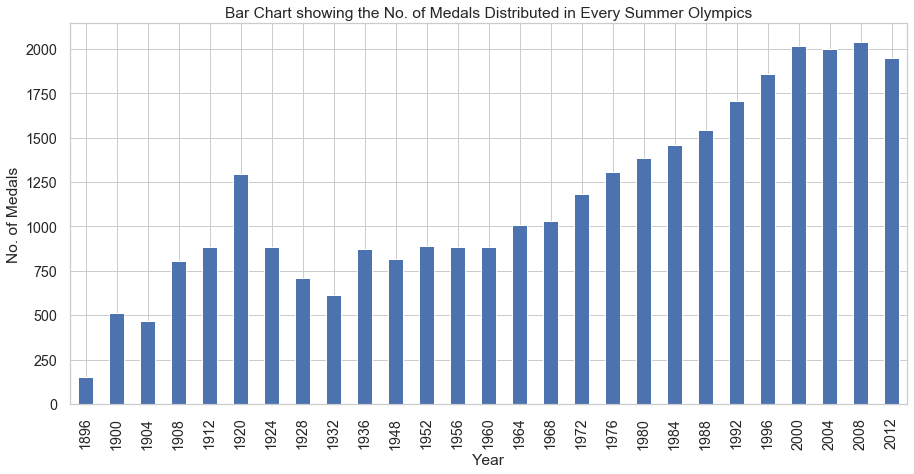

In [111]:
#df_oly['Year'].value_counts().sort_index().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)
df_oly['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Year')
plt.ylabel('No. of Medals')
plt.title('Bar Chart showing the No. of Medals Distributed in Every Summer Olympics')

Text(0.5, 1.0, 'Bar Chart showing the No. of Medals Distributed by Medal Category in Every Summer Olympics')

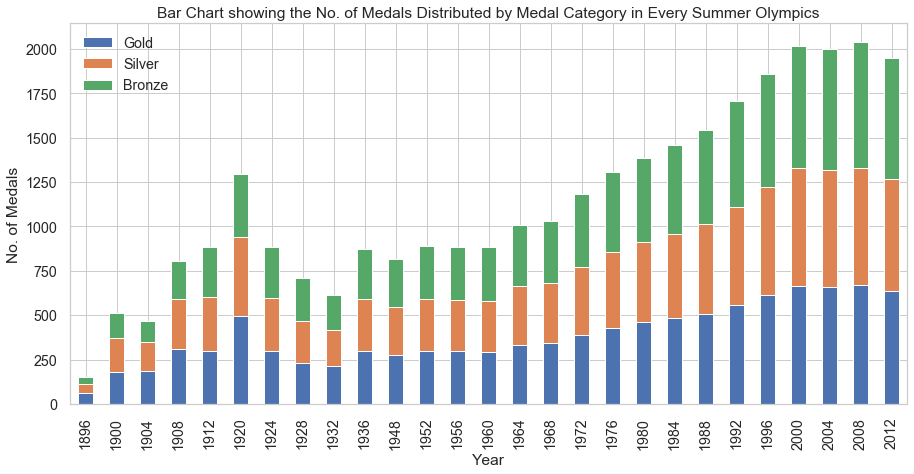

In [128]:
#df_oly.groupby(['Year', 'Medal']).size().xs('Gold', level='Medal').plot(kind='bar', figsize=(15, 7), color='orange')
#df_oly.groupby(['Year', 'Medal']).size().xs('Silver', level='Medal').plot(kind='bar', figsize=(15, 7), color='grey')
#df_oly.groupby(['Year', 'Medal']).size().xs('Bronze', level='Medal').plot(kind='bar', figsize=(15, 7), color='brown')
#df_oly.groupby(['Year', 'Medal']).size().unstack().plot(kind='bar', figsize=(15, 7), stacked=True)
df_medals = df_oly.groupby(['Year', 'Medal']).size().unstack()
df_medals.columns = pd.CategoricalIndex(df_medals.columns.values, ordered=True, categories=['Gold', 'Silver', 'Bronze'])
df_medals = df_medals.sort_index(axis=1)
df_medals.plot(kind='bar', figsize=(15, 7), stacked=True)
plt.xlabel('Year')
plt.ylabel('No. of Medals')
plt.title('Bar Chart showing the No. of Medals Distributed by Medal Category in Every Summer Olympics')

Text(0.5, 1.0, 'Bar Chart showing the No. of Medals Distributed by Gender in Every Summer Olympics')

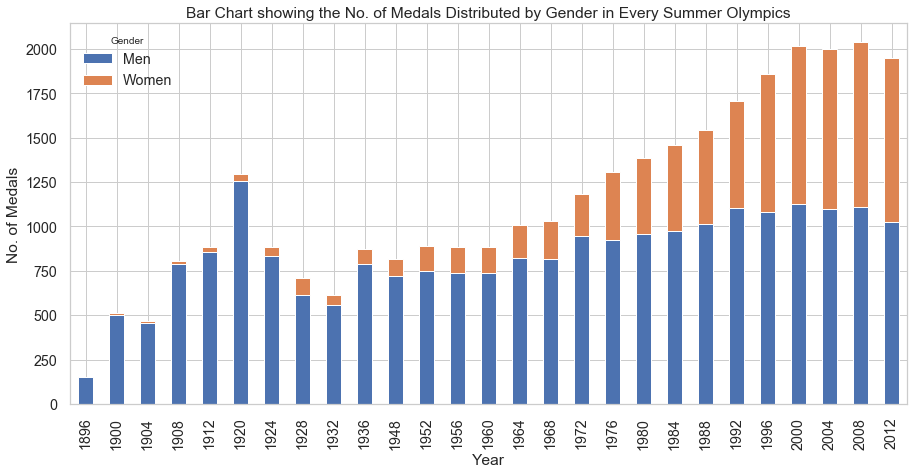

In [113]:
df_oly.groupby(['Year', 'Gender']).size().unstack().plot(kind='bar', figsize=(15, 7), stacked=True)
plt.xlabel('Year')
plt.ylabel('No. of Medals')
plt.title('Bar Chart showing the No. of Medals Distributed by Gender in Every Summer Olympics')

<a id=section702></a>
#### 7.2 Analysis Based on Sport Category

In [81]:
df_oly.Sport.unique()

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon', 'Canoe'], dtype=object)

In [129]:
df_oly.Sport.value_counts()

Aquatics             4170
Athletics            3638
Rowing               2667
Gymnastics           2307
Fencing              1613
Football             1497
Hockey               1421
Wrestling            1212
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         593
Judo                  491
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Softball              180
Modern Pentathlon     180
Table Tennis          144
Badminton             143
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacrosse               59
Golf                   30
Skating                27
Ice Hockey             27
Triathlon              24
Cricket                24
Rackets                10
Croquet     

Text(0.5, 1.0, 'Bar Chart showing the No. of Medals Distributed by Sports Category')

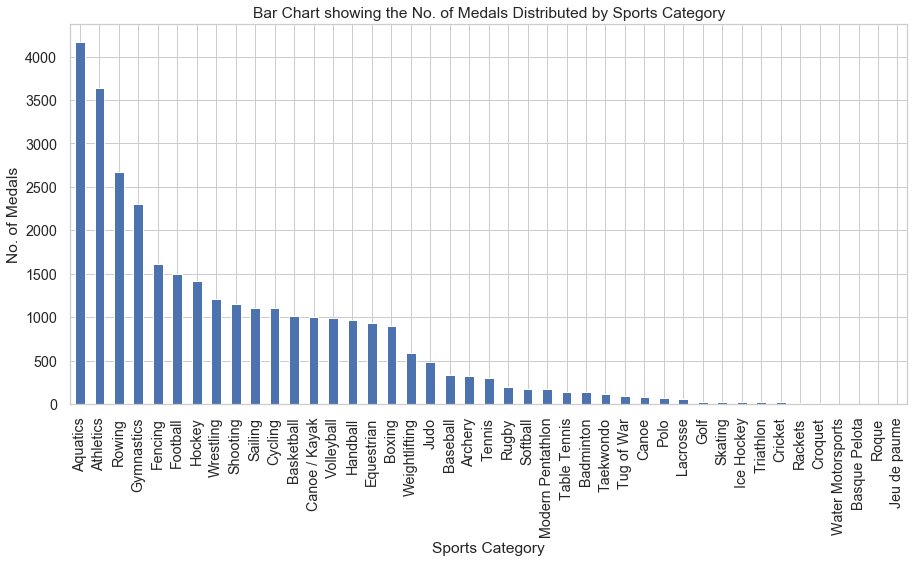

In [154]:
df_oly['Sport'].value_counts().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Sports Category')
plt.ylabel('No. of Medals')
plt.title('Bar Chart showing the No. of Medals Distributed by Sports Category')

<a id=section703></a>
#### 7.3 Analysis Based on Medals Won by Individual Athletes

Text(0.5, 1.0, 'Top 20 Athletes Having Most No. of Olympic Gold Medals')

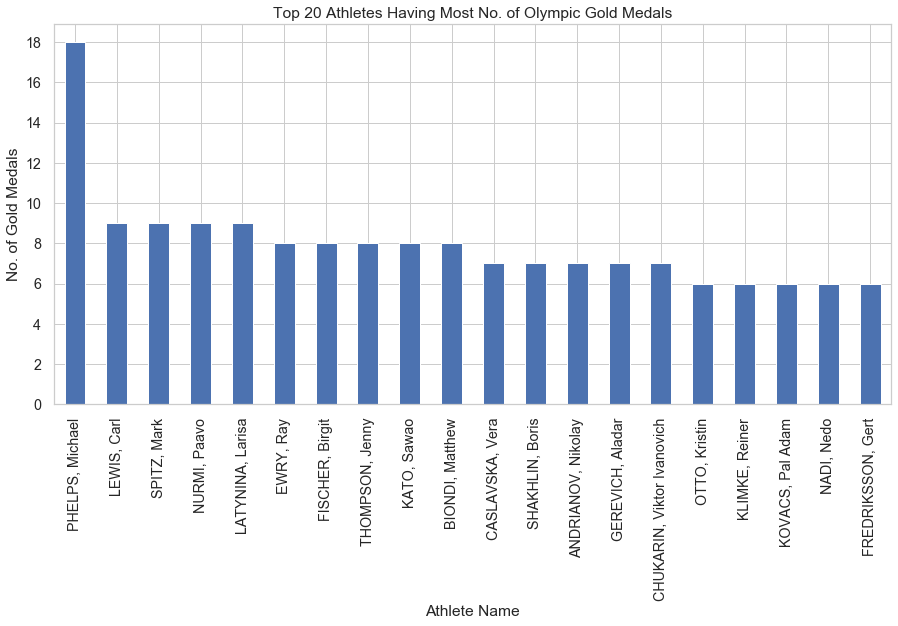

In [158]:
athlete_gold_series = df_oly['Athlete'][df_oly['Medal'] == 'Gold'].value_counts().nlargest(20)
athlete_gold_series.plot(kind='bar', figsize=(15, 7))
plt.xlabel('Athlete Name')
plt.ylabel('No. of Gold Medals')
plt.yticks(np.arange(0, max(athlete_series)+2, 2))
plt.title('Top 20 Athletes Having Most No. of Olympic Gold Medals')

Text(0.5, 1.0, 'Top 20 Athletes Having Most No. of Olympic Medals')

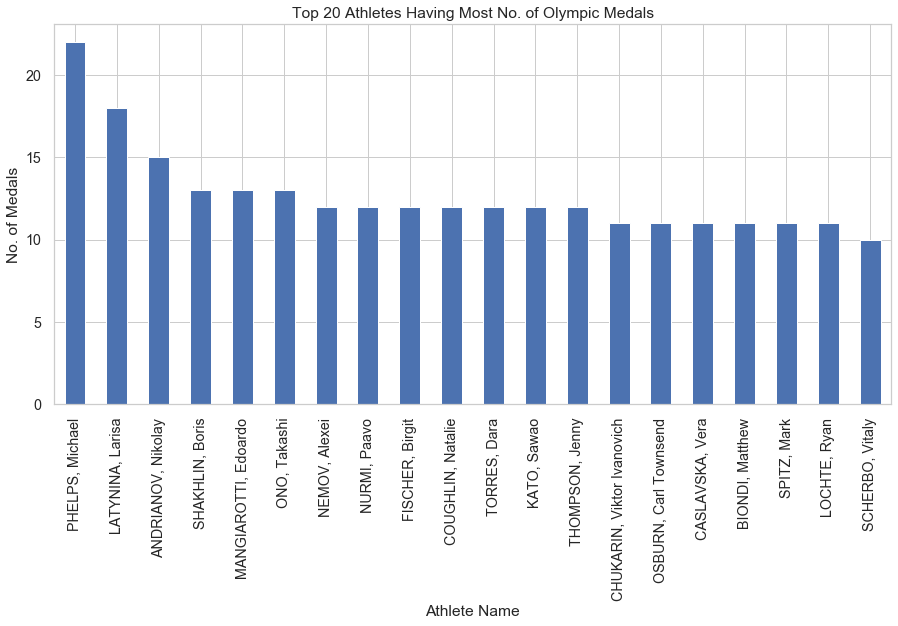

In [156]:
df_oly['Athlete'].value_counts().nlargest(20).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Athlete Name')
plt.ylabel('No. of Medals')
plt.title('Top 20 Athletes Having Most No. of Olympic Medals')

Text(0.5, 1.0, 'Top 20 Athletes Having Most No. of Olympic Medals Distributed by Medal Category')

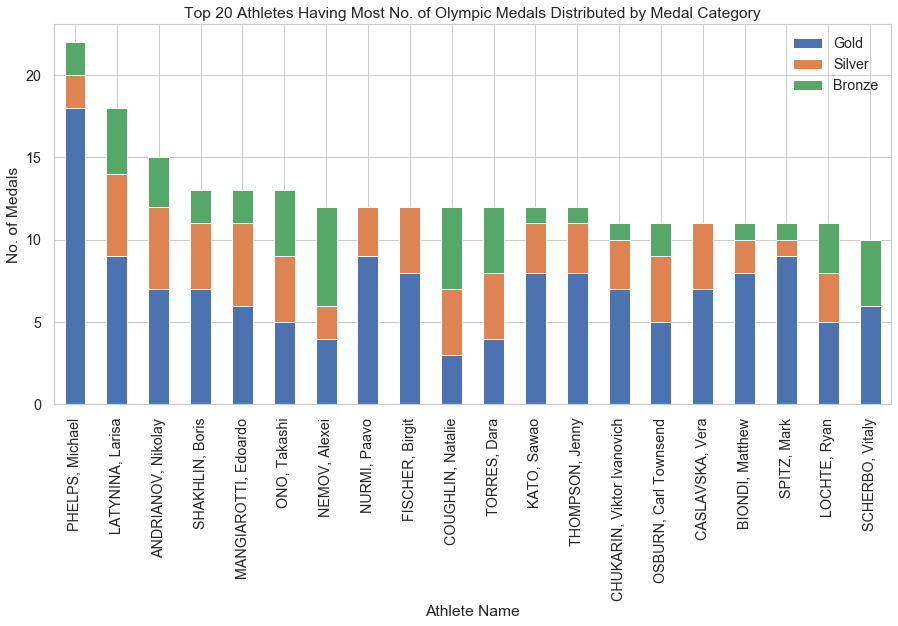

In [159]:
athlete_series = df_oly['Athlete'].value_counts().nlargest(20)
athlete_list = athlete_series.index.tolist()
#df_oly.loc[df_oly['Athlete'].isin(athlete_list)]
#df_oly.loc[df_oly['Athlete'].isin(athlete_list)].groupby(['Athlete', 'Medal']).size().unstack().plot(kind='bar', figsize=(15, 7), stacked=True)
df_top20_athletes = df_oly.loc[df_oly['Athlete'].isin(athlete_list)].groupby(['Athlete', 'Medal']).size().unstack()
df_top20_athletes.columns = pd.CategoricalIndex(df_top20_athletes.columns.values, ordered=True, categories=['Gold', 'Silver', 'Bronze'])
df_top20_athletes = df_top20_athletes.sort_index(axis=1)
df_top20_athletes_sorted = df_top20_athletes.reindex(index=athlete_list, copy=True)
df_top20_athletes_sorted.plot(kind='bar', figsize=(15, 7), stacked=True)
plt.xlabel('Athlete Name')
plt.ylabel('No. of Medals')
plt.title('Top 20 Athletes Having Most No. of Olympic Medals Distributed by Medal Category')

<a id=section704></a>
#### 7.4 Analysis Based on Medals Won by Countries

Text(0.5, 1.0, 'Top 20 Countries Having Most No. of Olympic Gold Medals')

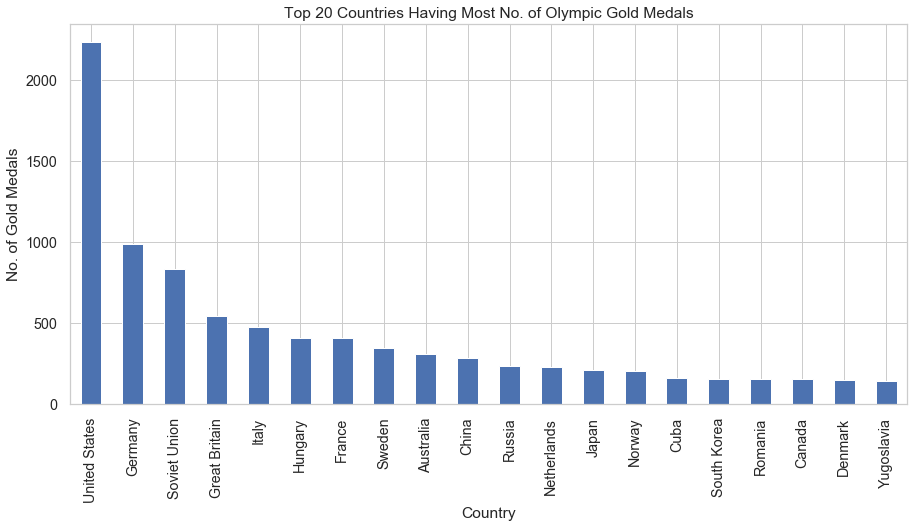

In [160]:
country_gold_series = df_oly['Country Name'][df_oly['Medal'] == 'Gold'].value_counts().nlargest(20)
country_gold_series.plot(kind='bar', figsize=(15, 7))
plt.xlabel('Country')
plt.ylabel('No. of Gold Medals')
plt.title('Top 20 Countries Having Most No. of Olympic Gold Medals')

Text(0.5, 1.0, 'Top 20 Countries Having Most No. of Olympic Medals')

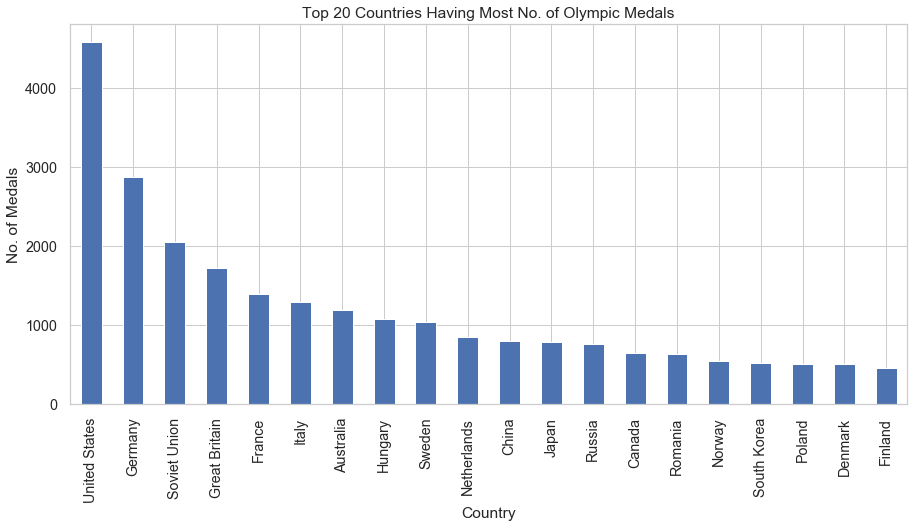

In [149]:
df_oly['Country Name'].value_counts().nlargest(20).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Country')
plt.ylabel('No. of Medals')
plt.title('Top 20 Countries Having Most No. of Olympic Medals')

Text(0.5, 1.0, 'Top 20 Countries Having Most No. of Olympic Medals Distributed by Medal Category')

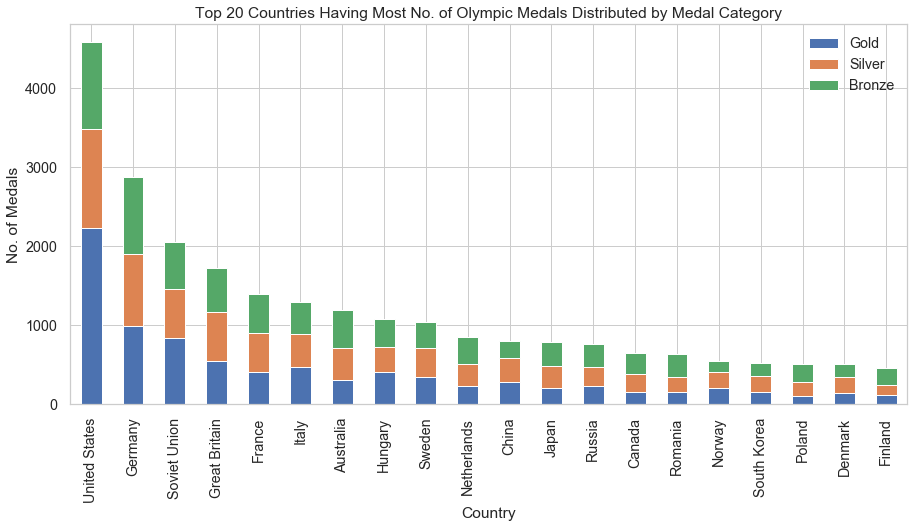

In [161]:
country_series = df_oly['Country Name'].value_counts().nlargest(20)
country_list = country_series.index.tolist()
df_top20_countries = df_oly.loc[df_oly['Country Name'].isin(country_list)].groupby(['Country Name', 'Medal']).size().unstack()
df_top20_countries.columns = pd.CategoricalIndex(df_top20_countries.columns.values, ordered=True, categories=['Gold', 'Silver', 'Bronze'])
df_top20_countries = df_top20_countries.sort_index(axis=1)
df_top20_countries_sorted = df_top20_countries.reindex(index=country_list, copy=True)
df_top20_countries_sorted.plot(kind='bar', figsize=(15, 7), stacked=True)
plt.xlabel('Country')
plt.ylabel('No. of Medals')
plt.title('Top 20 Countries Having Most No. of Olympic Medals Distributed by Medal Category')

<a id=section705></a>
#### 7.5 Analysis for Home Country Advantage

In [335]:
no_of_olympic_events = df_oly['Year'].nunique()

In [358]:
host_country_series = df_oly['Host Country'].value_counts()
host_country_list = host_country_series.index.tolist()
#host_country_list

In [435]:
home_medals_dict = {}
home_medals_list = []
total_medals_dict = {}
total_medals_list = []
host_no_times_dict = {'United States': 4, 'Great Britain': 3, 'Australia': 2, 'Greece': 2,
                      'Germany': 2, 'China': 1, 'Spain': 1, 'South Korea': 1, 'France': 2,
                      'Soviet Union': 1, 'Canada': 1, 'Belgium': 1, 'Mexico': 1, 'Japan': 1,
                      'Finland': 1, 'Sweden': 1, 'Italy': 1, 'Netherlands': 1}
host_no_times_list = [4, 3, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

for i in host_country_list:
    home_medal_value = df_oly.loc[(df_oly['Host Country'] == i) & (df_oly['Country Name'] == i)].groupby(['Medal']).size().sum()
    home_medals_dict[i] = home_medal_value
    home_medals_list.append(home_medal_value)
    total_medal_value = df_oly.loc[(df_oly['Country Name'] == i)].groupby(['Medal']).size().sum()
    total_medals_dict[i] = total_medal_value
    total_medals_list.append(total_medal_value)

df1 = pd.DataFrame(home_medals_list, columns=['Medals Won in Home Country'], index=host_country_list)
df2 = pd.DataFrame(total_medals_list, columns=['Total Medals Won in Olympics'], index=host_country_list)
df3 = pd.DataFrame(host_no_times_list, columns=['No. of Olympics Hosted'], index=host_country_list)

home_advantage_df = pd.concat([df1, df2, df3], axis=1)
home_advantage_df['Avg. Medals per Olympics'] = round(home_advantage_df['Total Medals Won in Olympics'] / no_of_olympic_events)
home_advantage_df['Avg. Medals Won in Home Country'] = round(home_advantage_df['Medals Won in Home Country'] / home_advantage_df['No. of Olympics Hosted'])
home_advantage_df

,Medals Won in Home Country,Total Medals Won in Olympics,No. of Olympics Hosted,Avg. Medals per Olympics,Avg. Medals Won in Home Country
United States,1168,4585,4,170.0,292.0
Great Britain,529,1720,3,64.0,176.0
Australia,244,1189,2,44.0,122.0
Greece,83,148,2,5.0,42.0
Germany,454,2880,2,107.0,227.0
China,184,806,1,30.0,184.0
Spain,66,442,1,16.0,66.0
South Korea,77,530,1,20.0,77.0
France,307,1396,2,52.0,154.0
Soviet Union,442,2050,1,76.0,442.0


Text(0.5, 1.0, 'Comparison Chart for Avg No. of Medals vs Avg No. of Medals Won in Home Country')

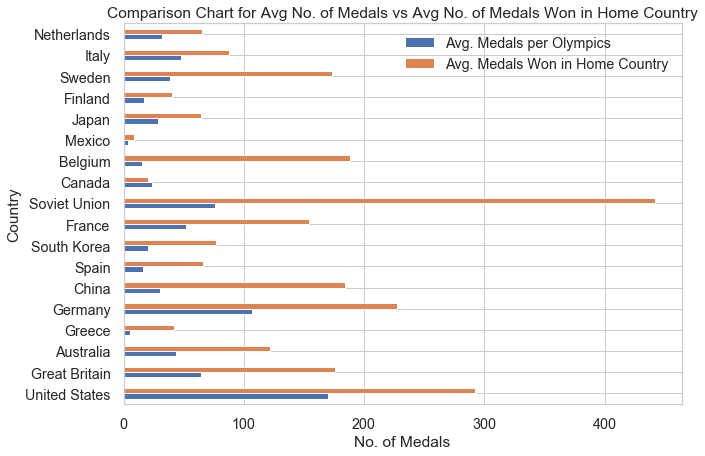

In [433]:
home_advantage_df[['Avg. Medals per Olympics', 'Avg. Medals Won in Home Country']].plot(kind='barh', figsize=(10, 7))
plt.xlabel('No. of Medals')
plt.ylabel('Country')
plt.title('Comparison Chart for Avg No. of Medals vs Avg No. of Medals Won in Home Country')

<a id=section706></a>
#### 7.6 Analysis for No. of Events in Every Olympics

Text(0.5, 1.0, 'No. of Unique Events in Each Olympics')

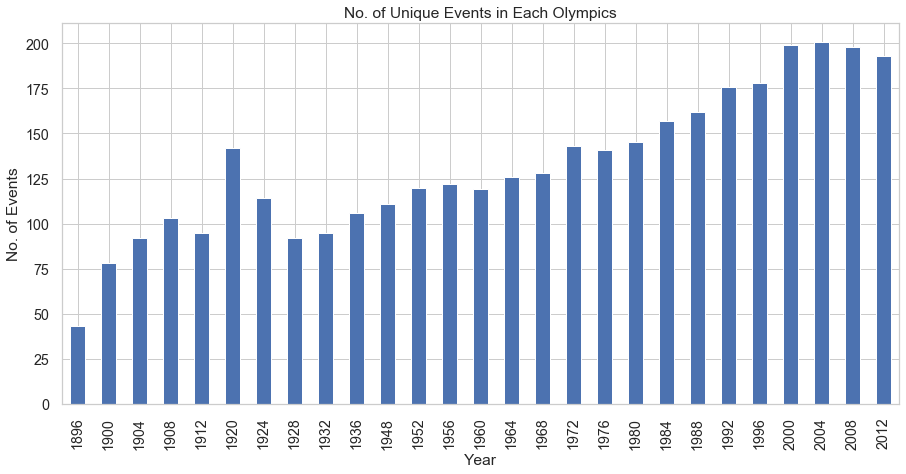

In [461]:
events_group = df_oly.groupby('Year')
events_df = events_group.apply(lambda x: len(x['Event'].unique()))
events_df.plot(kind='bar', figsize=(15, 7))
plt.xlabel('Year')
plt.ylabel('No. of Events')
plt.title('No. of Unique Events in Each Olympics')

<a id=section707></a>
#### 7.7 Analysis for Performance of India at Olympics

In [462]:
df_india = df_oly.loc[df_oly['Country Name'] == 'India']

Text(0.5, 1.0, 'Medals Won by India Across Category of Events')

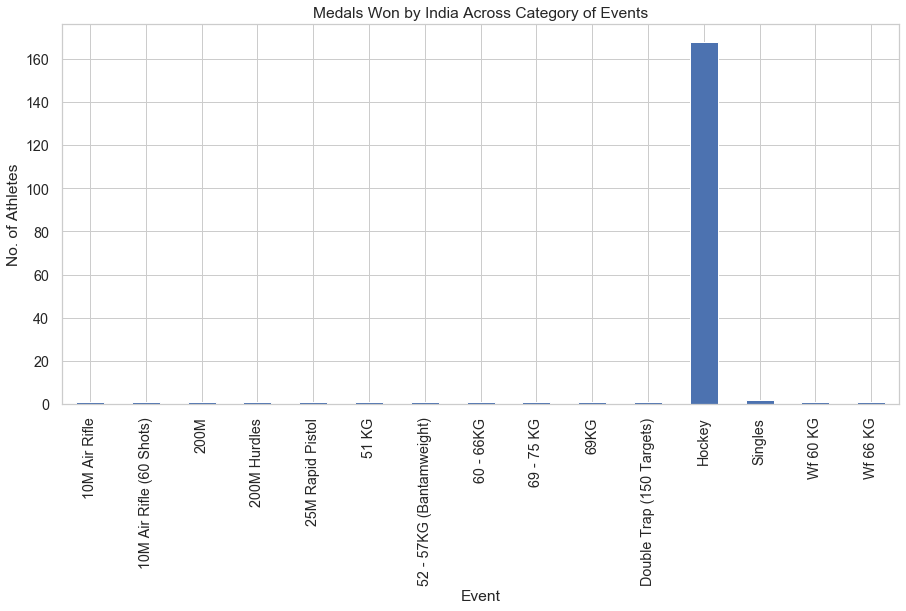

In [478]:
df_india.groupby(['Event']).size().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Event')
plt.ylabel('No. of Athletes')
plt.title('Medals Won by India Across Category of Events')

Text(0.5, 1.0, 'Types of Medals Won by India Across Category of Events')

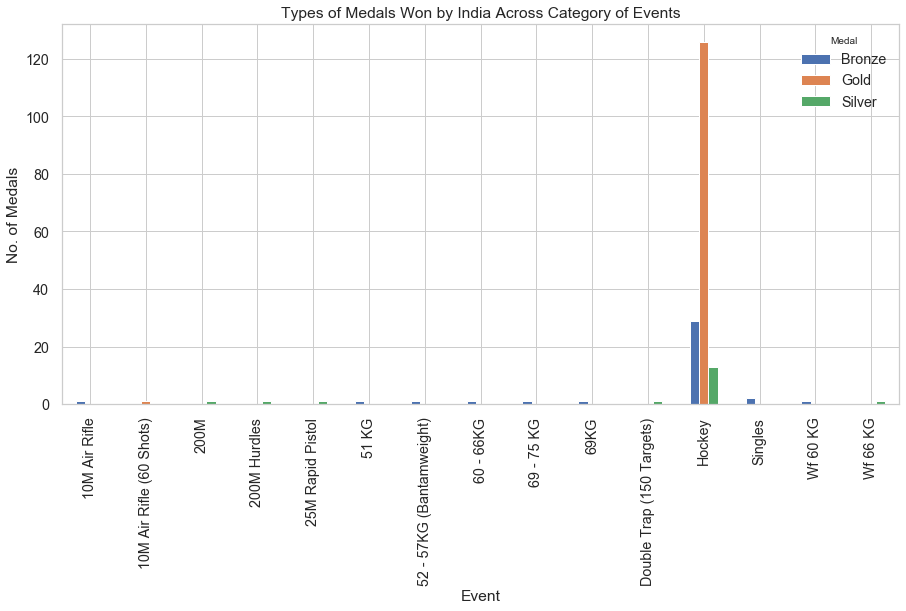

In [479]:
df_india.groupby(['Event', 'Medal']).size().unstack().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Event')
plt.ylabel('No. of Medals')
plt.title('Types of Medals Won by India Across Category of Events')

In [484]:
first_individual_gold = df_india.loc[(df_oly['Medal'] == 'Gold') & (df_oly['Event'] == '10M Air Rifle (60 Shots)')]
first_individual_gold

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Country Name,Host Country
28856,2008,Beijing,Shooting,Shooting,"BINDRA, Abhinav",IND,Men,10M Air Rifle (60 Shots),Gold,India,China


<a id=section708></a>
#### 7.8 Analysis for Performance of Top Ranked Country (USA) at Olympics

Text(0.5, 1.0, 'Medals Won by USA at Olympic Events')

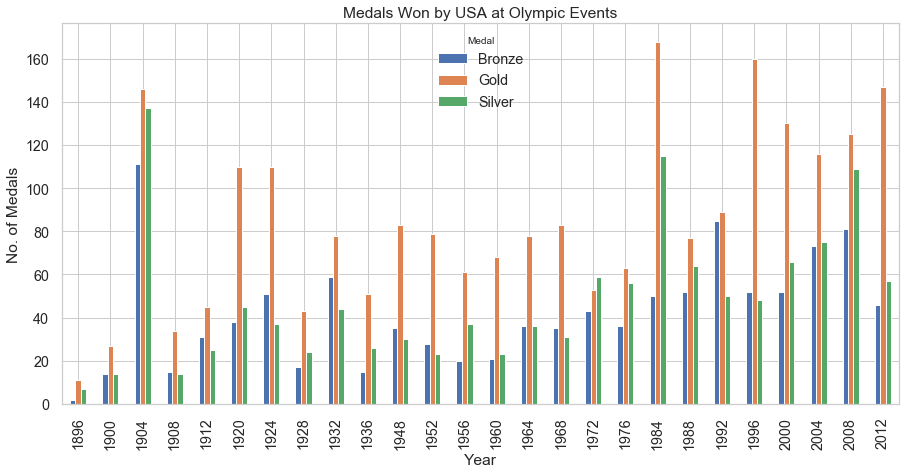

In [492]:
df_usa = df_oly.loc[df_oly['Country Name'] == 'United States']
df_usa.groupby(['Year', 'Medal']).size().unstack().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Year')
plt.ylabel('No. of Medals')
plt.title('Medals Won by USA at Olympic Events')

Text(0.5, 1.0, 'Donut Plot showing the proportion of each Category in which USA has won Olympic Medals')

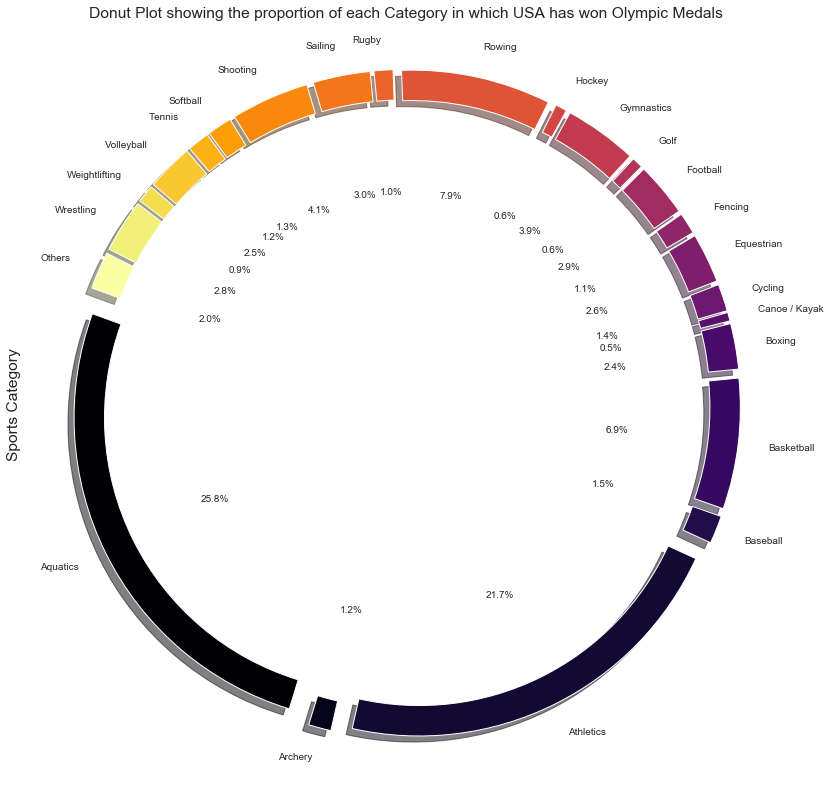

In [586]:
df_usa['Sport'].value_counts()
us_sports_series = df_usa.groupby(['Sport']).size()
add = 0
drop_list = []
for index, value in us_sports_series.items():
    if value < 20:
        add += value
        drop_list.append(index)

modified_series = us_sports_series.drop(labels=drop_list)
modified_series['Others'] = add
modified_series.plot(kind='pie', autopct='%2.1f%%', wedgeprops=dict(width=0.1), 
                    explode=np.ones(len(modified_series))/10, figsize=(14, 14), fontsize=10, 
                    startangle=160, shadow=True, cmap='inferno', legend=False)

plt.ylabel('Sports Category')
plt.title('Donut Plot showing the proportion of each Category in which USA has won Olympic Medals')

<a id=section8></a>
### 8. Conclusion

- It is analyzed that USA Country is more dominant at Olympics.
- Almost 1 out of Every 2 Medals Won by USA come from Aquatics & Atheletics Category.
- India needs to perform well based on Population Size.
- India can increase Female Participation to Win More Medals.